In [1]:
import pyarrow.parquet as pq
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
import numpy as np
import scipy

2023-08-10 18:29:16.286655: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.3-6fa5c/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.3-c1d8e/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow/contrib

In [2]:
PLOT_FOLDER = "./Plots_bbgg/"

In [3]:
skim = pq.read_table("/eos/user/a/atalierc/FCC_HH_13/FCCAnalyses/run/bbyy_analysis/df_Sel_All_haaIncluded.parquet")#df_Sel_All.parquet")
df_ = skim.to_pandas()

In [4]:
df_["label"] = 0
df_.loc[df_.process.str.contains("pwp8_pp_hh_lambda100_5f_hhbbaa"), ['label']] = 1
df_.loc[df_.process.str.contains("pwp8_pp_hh_lambda000_5f_hhbbaa"), ['label']] = 1
df_.loc[df_.process.str.contains("pwp8_pp_hh_lambda240_5f_hhbbaa"), ['label']] = 1
df_.loc[df_.process.str.contains("pwp8_pp_hh_lambda300_5f_hhbbaa"), ['label']] = 1

In [5]:
df_['Mx'] = df_['hh_m'] - df_['haa_m'] - df_['hbb_m'] + 250

51


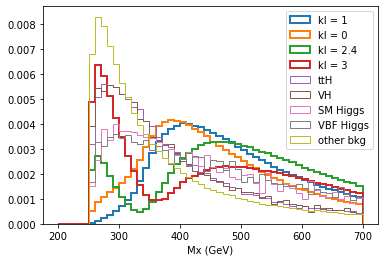

In [6]:
(n_b, bins_b, _) = plt.hist(df_.loc[(df_.process=='pwp8_pp_hh_lambda100_5f_hhbbaa') ].Mx, label='kl = 1', histtype=("step"), bins=50,density=True, alpha=1.0, linewidth=2, range=(200,700));
(n_b, bins_b, _) = plt.hist(df_.loc[(df_.process=='pwp8_pp_hh_lambda000_5f_hhbbaa') ].Mx, label='kl = 0', histtype=("step"), bins=50,density=True, alpha=1.0, linewidth=2, range=(200,700));
(n_b, bins_b, _) = plt.hist(df_.loc[(df_.process=='pwp8_pp_hh_lambda240_5f_hhbbaa')].Mx, label='kl = 2.4', histtype=("step"), bins=50,density=True, alpha=1.0, linewidth=2, range=(200,700));
(n_b, bins_b, _) = plt.hist(df_.loc[(df_.process=='pwp8_pp_hh_lambda300_5f_hhbbaa') ].Mx, label='kl = 3', histtype=("step"), bins=50,density=True, alpha=1.0, linewidth=2, range=(200,700));

(n_b, bins_b, _) = plt.hist(df_.loc[(df_.process=='mgp8_pp_tth01j_5f_haa')].Mx, label='ttH', histtype=("step"), bins=50,density=True, range=(200,700));
(n_b, bins_b, _) = plt.hist(df_.loc[(df_.process=='mgp8_pp_vh012j_5f_haa')].Mx, label='VH', histtype=("step"), bins=50,density=True, range=(200,700));
(n_b, bins_b, _) = plt.hist(df_.loc[(df_.process=='mgp8_pp_h012j_5f_haa')].Mx, label='SM Higgs', histtype=("step"), bins=50,density=True, range=(200,700));
(n_b, bins_b, _) = plt.hist(df_.loc[(df_.process=='mgp8_pp_vbf_h01j_5f_haa')].Mx, label='VBF Higgs', histtype=("step"), bins=50,density=True, range=(200,700));

(n_b, bins_b, _) = plt.hist(df_.loc[(df_.process=="mgp8_pp_jjaa_5f")].Mx, label='other bkg', histtype=("step"), bins=50,density=True, range=(200,700));


plt.legend(loc = 'upper right')
plt.xlabel('Mx (GeV)')
plt.savefig(PLOT_FOLDER+'h_Mx.pdf')
#plt.yscale('log')
print(len(bins_b))

In [7]:
var = {  "njets" : [-0.5, 10.5, 11, "nJets"],
                #"tag_b1",
                #"tag_b2",
                "pTb1_o_m_bb" : [0, 6, 30, r"$p_{T b1}$ \ $mass_{bb}$ (GeV)"],
                "pTb2_o_m_bb" : [0, 4, 30, r"$p_{T b2}$ \ $mass_{bb}$ (GeV)"],
                "pTbb_o_m_HH" : [0, 3, 30, r"$p_{T bb}$ \ $mass_{HH}$ (GeV)"],
                "pTg1_o_m_gg" : [0, 6, 30, r"$p_{T g1}$ \ $mass_{gg}$ (GeV)"],
                "pTg2_o_m_gg" : [0, 4, 30, r"$p_{T g2}$ \ $mass_{gg}$ (GeV)"],
                "pTgg_o_m_HH" : [0, 3, 30, r"$p_{T gg}$ \ $mass_{HH}$ (GeV)"],
                "nLep"  : [-0.5, 10.5, 11, "nLep"],
                "pT_l1" : [0, 300, 30, r"$pT_{l1}$"],
                "pT_l2" : [0, 300, 30, r"$pT_{l1}$"],
                "sum_pt" : [0, 500, 30, r"sum $p_T$ (GeV)"],
                "mindR_gb" : [0, 5, 20, r"min $\Delta$ $R_{gb}$"],
                "otherdR_gb" : [0, 5, 20, r"other $\Delta$ $R_{gb}$"],
                "GG_cosT_restHH" : [0, 1, 20, r"cosT rest frame HH"],
                "B1_cosT_restBB" : [0, 1, 20, r"cosT rest frame bb"],
                "G1_cosT_restGG": [0, 1, 20, r"cosT rest frame gg"],
                "DeltaPhi_gg" : [0, 4, 20, r"$\Delta \phi (gg)$"],
                "DeltaEta_gg": [0, 4, 20, r"$\Delta \eta (gg)$"],
                "DeltaPhi_bb": [0, 4, 20, r"$\Delta \phi (bb)$"],
                "DeltaEta_bb": [0, 4, 20, r"$\Delta \eta (bb)$"],
                "DeltaPhi_HH": [0, 4, 20, r"$\Delta \phi (HH)$"],
                "DeltaEta_HH": [0, 4, 20, r"$\Delta \eta (HH)$"]
                }

In [8]:
df_.process.unique()

array(['pwp8_pp_hh_lambda000_5f_hhbbaa', 'pwp8_pp_hh_lambda100_5f_hhbbaa',
       'pwp8_pp_hh_lambda240_5f_hhbbaa', 'pwp8_pp_hh_lambda300_5f_hhbbaa',
       'mgp8_pp_tth01j_5f_haa', 'mgp8_pp_h012j_5f_haa', 'mgp8_pp_jjaa_5f',
       'mgp8_pp_vh012j_5f_haa', 'mgp8_pp_vbf_h01j_5f_haa'], dtype=object)

In [9]:
for proc in df_.process.unique():
    print(proc)
    print(df_.loc[df_.process==proc,"weight"].sum())
    print("---")
#df_.duplicated().unique()

pwp8_pp_hh_lambda000_5f_hhbbaa
50491.312
---
pwp8_pp_hh_lambda100_5f_hhbbaa
26060.646
---
pwp8_pp_hh_lambda240_5f_hhbbaa
11185.368
---
pwp8_pp_hh_lambda300_5f_hhbbaa
11880.53
---
mgp8_pp_tth01j_5f_haa
298982.06
---
mgp8_pp_h012j_5f_haa
926454.9
---
mgp8_pp_jjaa_5f
11593152.0
---
mgp8_pp_vh012j_5f_haa
41548.125
---
mgp8_pp_vbf_h01j_5f_haa
160531.47
---


In [10]:
for proc in df_.process.unique():
    print(proc)
    print(len(df_.loc[df_.process==proc,"weight"]))
    print("---")

pwp8_pp_hh_lambda000_5f_hhbbaa
1296776
---
pwp8_pp_hh_lambda100_5f_hhbbaa
1113154
---
pwp8_pp_hh_lambda240_5f_hhbbaa
1415969
---
pwp8_pp_hh_lambda300_5f_hhbbaa
1270241
---
mgp8_pp_tth01j_5f_haa
81047
---
mgp8_pp_h012j_5f_haa
6158
---
mgp8_pp_jjaa_5f
357694
---
mgp8_pp_vh012j_5f_haa
12344
---
mgp8_pp_vbf_h01j_5f_haa
6514
---


Saved


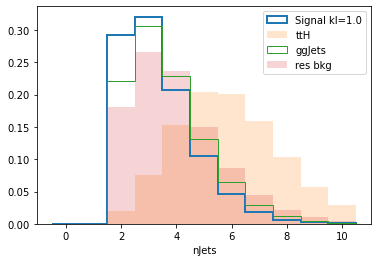

Saved


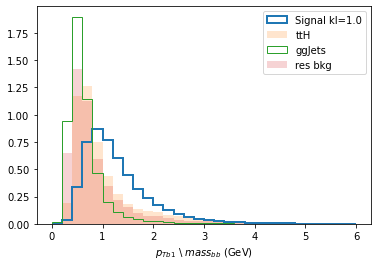

Saved


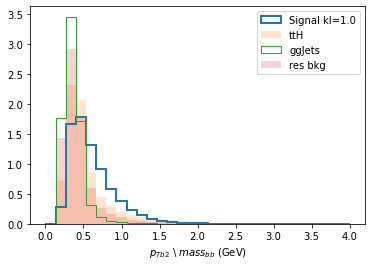

Saved


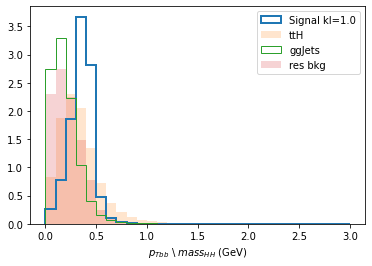

Saved


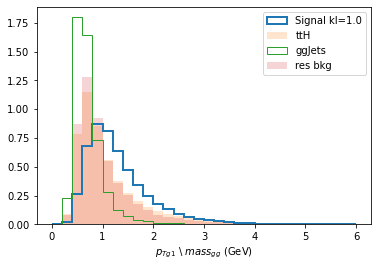

Saved


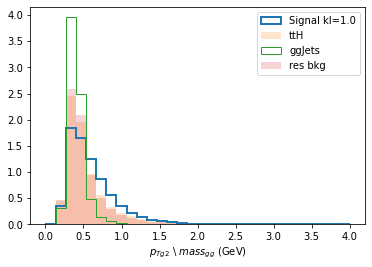

Saved


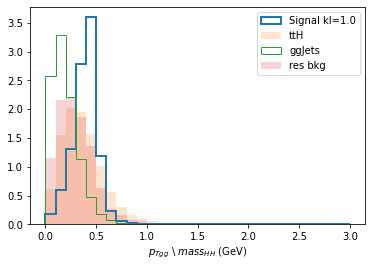

Saved


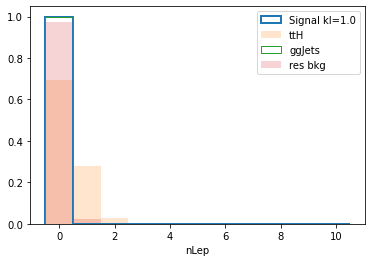

Saved


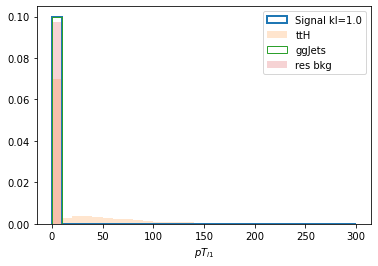

Saved


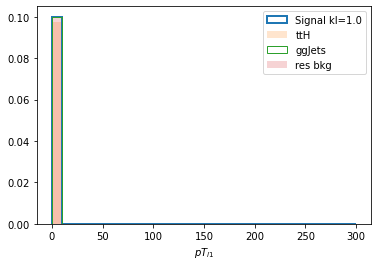

Saved


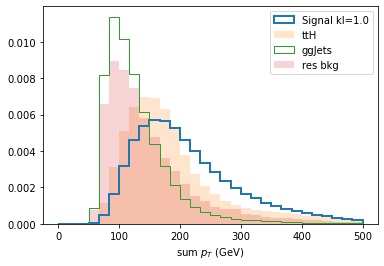

Saved


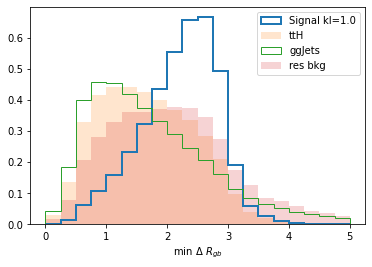

Saved


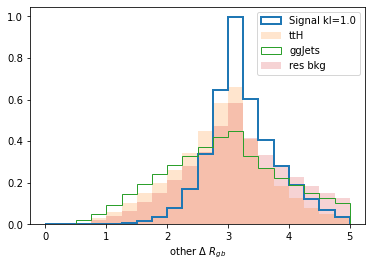

Saved


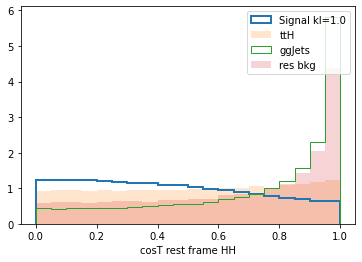

Saved


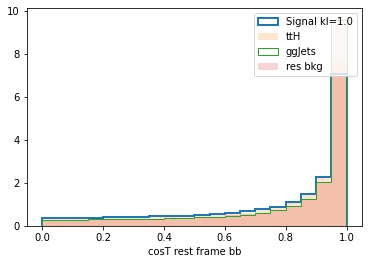

Saved


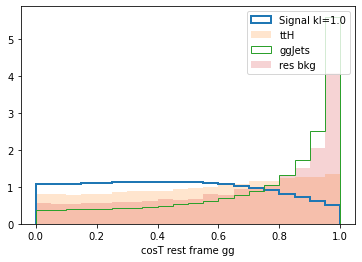

Saved


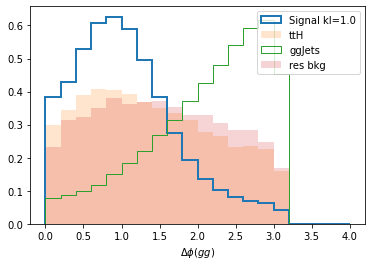

Saved


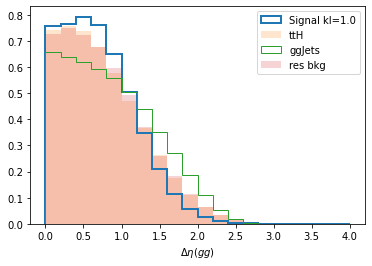

Saved


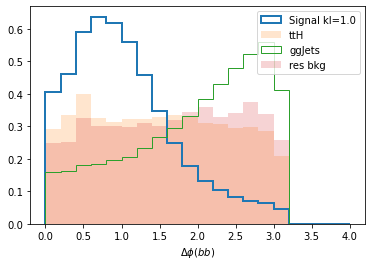

Saved


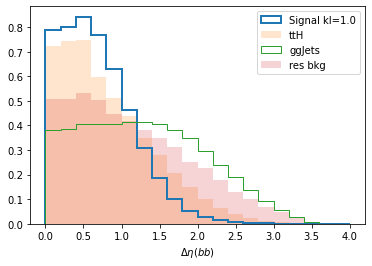

Saved


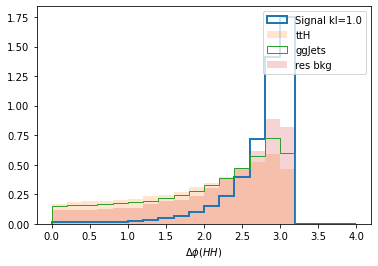

Saved


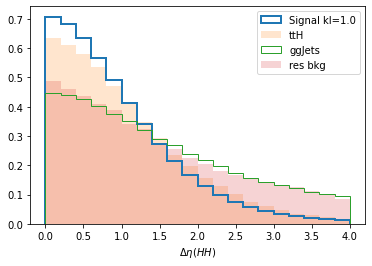

In [11]:
for key in var:
    #print(key)

    plt.hist(df_.loc[df_.process=="pwp8_pp_hh_lambda100_5f_hhbbaa",:][key], histtype=("step"),range=(var[key][0],var[key][1]),  bins=var[key][2], density = True, label = "Signal kl=1.0", alpha=1.0, linewidth=2)
    #plt.hist(df_.loc[df_.process=="pwp8_pp_hh_lambda240_5f_hhbbaa",:][key], histtype=("step"),range=(var[key][0],var[key][1]),  bins=var[key][2], density = True, label = "Signal kl=2.4" )
    #plt.hist(df_.loc[df_.process=="pwp8_pp_hh_lambda300_5f_hhbbaa",:][key], histtype=("step"),range=(var[key][0],var[key][1]),  bins=var[key][2], density = True, label = "Signal kl=3.0" )
    #plt.hist(df_.loc[df_.process=="pwp8_pp_hh_lambda000_5f_hhbbaa",:][key], histtype=("step"),range=(var[key][0],var[key][1]),  bins=var[key][2], density = True, label = "Signal kl=0" )
    plt.hist(df_.loc[df_.process=="mgp8_pp_tth01j_5f_haa",:][key], histtype=("stepfilled"),range=(var[key][0],var[key][1]),  bins=var[key][2], density = True, label = "ttH", alpha=0.2 )
    plt.hist(df_.loc[df_.process=="mgp8_pp_jjaa_5f",:][key], histtype=("step"),range=(var[key][0],var[key][1]),  bins=var[key][2], density = True, label = "ggJets" )
    plt.hist(df_.loc[(df_.label==0) & (df_.process!='mgp8_pp_tth01j_5f_haa') & (df_.process != "mgp8_pp_jjaa_5f"),:][key], histtype=("stepfilled"),range=(var[key][0],var[key][1]),  bins=var[key][2],alpha=0.2, density = True, label = "res bkg" )

    #plt.hist(df.loc[df.process=="ZZTo4L",:][key], histtype=("step"),range=(var[key][0],var[key][1]),  bins=var[key][2], density = True, label = "bkg" )    
    #plt.hist(df.loc[df.process=="DY",:][key], histtype=("step"),range=(var[key][0],var[key][1]),  bins=var[key][2], density = True, label = "bkg" )    
    plt.legend(loc='best')
    plt.xlabel(var[key][3])

    plt.savefig(PLOT_FOLDER+'h_'+key+'.pdf')
    print("Saved")
    plt.show()

In [12]:
input_vars = [  "njets",
                #"tag_b1",
                #"tag_b2",
                "pTb1_o_m_bb",
                "pTb2_o_m_bb",
                "pTbb_o_m_HH",
                "pTg1_o_m_gg",
                "pTg2_o_m_gg",
                "pTgg_o_m_HH",
                "sum_pt",
                "mindR_gb",
                "otherdR_gb",
                "GG_cosT_restHH",
                "B1_cosT_restBB",
                "G1_cosT_restGG",
                "DeltaPhi_gg",
                "DeltaEta_gg",
                "DeltaPhi_bb",
                "DeltaEta_bb",
                "DeltaPhi_HH",
                "DeltaEta_HH"
             ]

In [25]:
def simpleDNN(input_vars,X_train, X_test, y_train, y_test):
    inputs = keras.Input(shape=(len(input_vars),), name="particles")
    x = layers.Dense(132, activation="relu", name="dense_1")(inputs)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    x = layers.Dense(64, activation="relu", name="dense_3")(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
          #optimizer=keras.optimizers.RMSprop(),  # Optimizer
          optimizer=keras.optimizers.Adam(),
          # Loss function to minimize
          loss=keras.losses.BinaryCrossentropy(),
          # List of metrics to monitor
          metrics=[keras.metrics.BinaryAccuracy()],
          )
    
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', min_delta=0.001, patience=10, verbose=1, mode='auto')
    history = model.fit(
    X_train,
    y_train,
    batch_size=1028,
    epochs=500,
    callbacks = [earlystop],
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
    )
    return model, history

In [14]:
df_only_bkg = df_.loc[df_.label==0]

In [ ]:
####ttH killer

In [15]:
df_ttHKiller = df_.loc[(df_.label ==1) | (df_.process == "mgp8_pp_tth01j_5f_haa") ]

In [16]:
df_ttHKiller.process.unique()

array(['pwp8_pp_hh_lambda000_5f_hhbbaa', 'pwp8_pp_hh_lambda100_5f_hhbbaa',
       'pwp8_pp_hh_lambda240_5f_hhbbaa', 'pwp8_pp_hh_lambda300_5f_hhbbaa',
       'mgp8_pp_tth01j_5f_haa'], dtype=object)

In [17]:
for proc in df_ttHKiller.process.unique():
    print(proc)
    print(len(df_ttHKiller.loc[df_ttHKiller.process==proc,"weight"]))
    print("---")

pwp8_pp_hh_lambda000_5f_hhbbaa
1296776
---
pwp8_pp_hh_lambda100_5f_hhbbaa
1113154
---
pwp8_pp_hh_lambda240_5f_hhbbaa
1415969
---
pwp8_pp_hh_lambda300_5f_hhbbaa
1270241
---
mgp8_pp_tth01j_5f_haa
81047
---


In [18]:
print(len(df_ttHKiller.loc[df_ttHKiller.label==0,"weight"]))
print(len(df_ttHKiller.loc[df_ttHKiller.label==1,"weight"]))

81047
5096140


In [19]:
#reduce dataset
print(df_ttHKiller.shape)
drop_indices = np.random.choice(df_ttHKiller.loc[df_ttHKiller.label == 1].index, 5000000, replace=False)
df_subset = df_ttHKiller.drop(drop_indices)

(5177187, 45)


In [20]:
print(df_subset.shape)
print(len(df_subset.loc[df_subset.label==1,"weight"]))

(177187, 45)
96140


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_subset[input_vars], df_subset.label, 
                                                    test_size=0.50, random_state=42)

In [29]:
model, history = simpleDNN(input_vars, X_train, X_test, y_train, y_test)

Epoch 1/500
87/87 [==============================] - 2s 11ms/step - loss: 1.3323 - binary_accuracy: 0.5194 - val_loss: 0.6748 - val_binary_accuracy: 0.5797
Epoch 2/500
87/87 [==============================] - 1s 9ms/step - loss: 0.7197 - binary_accuracy: 0.5300 - val_loss: 0.6872 - val_binary_accuracy: 0.5416
Epoch 3/500
87/87 [==============================] - 1s 9ms/step - loss: 0.6870 - binary_accuracy: 0.5549 - val_loss: 0.6799 - val_binary_accuracy: 0.5671
Epoch 4/500
87/87 [==============================] - 1s 9ms/step - loss: 0.6749 - binary_accuracy: 0.5951 - val_loss: 0.6379 - val_binary_accuracy: 0.6875
Epoch 5/500
87/87 [==============================] - 1s 9ms/step - loss: 0.6166 - binary_accuracy: 0.6744 - val_loss: 0.4988 - val_binary_accuracy: 0.7953
Epoch 6/500
87/87 [==============================] - 1s 8ms/step - loss: 0.5228 - binary_accuracy: 0.7577 - val_loss: 0.4393 - val_binary_accuracy: 0.8101
Epoch 7/500
87/87 [==============================] - 1s 8ms/step - lo

87/87 [==============================] - 1s 9ms/step - loss: 0.3700 - binary_accuracy: 0.8354 - val_loss: 0.3602 - val_binary_accuracy: 0.8411
Epoch 54/500
87/87 [==============================] - 1s 10ms/step - loss: 0.3704 - binary_accuracy: 0.8355 - val_loss: 0.3626 - val_binary_accuracy: 0.8398
Epoch 55/500
87/87 [==============================] - 1s 8ms/step - loss: 0.3690 - binary_accuracy: 0.8370 - val_loss: 0.3587 - val_binary_accuracy: 0.8402
Epoch 56/500
87/87 [==============================] - 1s 9ms/step - loss: 0.3692 - binary_accuracy: 0.8368 - val_loss: 0.3594 - val_binary_accuracy: 0.8403
Epoch 57/500
87/87 [==============================] - 1s 9ms/step - loss: 0.3688 - binary_accuracy: 0.8365 - val_loss: 0.3601 - val_binary_accuracy: 0.8405
Epoch 58/500
87/87 [==============================] - 1s 9ms/step - loss: 0.3698 - binary_accuracy: 0.8353 - val_loss: 0.3560 - val_binary_accuracy: 0.8414
Epoch 59/500
87/87 [==============================] - 1s 9ms/step - loss: 0.

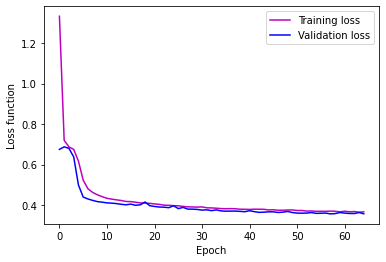

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='m',label='Training loss')
plt.plot(history.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.legend(loc='upper right')
plt.savefig(PLOT_FOLDER+'ttH_killer_training_validation_loss.pdf')
plt.show()

[[0.92682576]
 [0.48126626]
 [0.25246033]
 ...
 [0.6396885 ]
 [0.8864881 ]
 [0.9225954 ]]


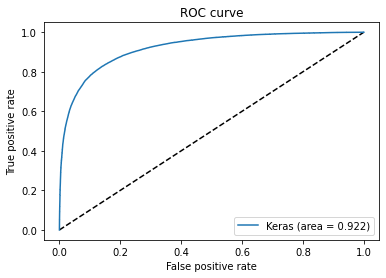

In [33]:
prediction = model.predict(X_test)
from sklearn.metrics import roc_curve
#y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, prediction)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

print(prediction)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='XGBoost (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig(PLOT_FOLDER+'ttH_killer_ROC_dnn.pdf')
plt.show()

In [39]:
model.save("./model_ttH_killer_dnn")
print("Saved model to disk")

2023-08-10 18:37:33.397783: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./model_ttH_killer_dnn/assets
Saved model to disk


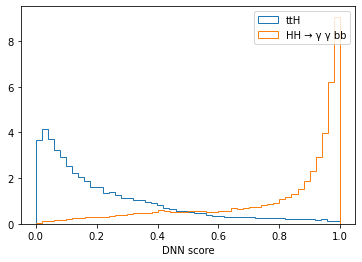

In [34]:
(n_b, bins_b, _) = plt.hist(prediction[y_test==0], label='ttH', histtype=("step"), bins=50,density=True);
(n_s, bins_s, _) = plt.hist(prediction[y_test==1], label='HH \u2192 \u03B3 \u03B3 bb', histtype=("step"), bins =50,density=True);
plt.legend(loc = 'best')
plt.xlabel('DNN score')
plt.savefig(PLOT_FOLDER+'ttH_killer_score_dnn.pdf')

In [35]:
df_subset['prediction'] = model.predict(df_subset[input_vars])

In [36]:
df_only_bkg['prediction'] = model.predict(df_only_bkg[input_vars])

/tmp/ipykernel_17516/1536561302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_bkg['prediction'] = model.predict(df_only_bkg[input_vars])


21


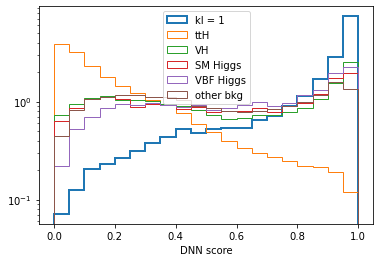

In [37]:
(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda100_5f_hhbbaa'].prediction, label='kl = 1', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
#(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda000_5f_hhbbaa'].prediction, label='kl = 0', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
#(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda240_5f_hhbbaa'].prediction, label='kl = 2.4', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
#(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda300_5f_hhbbaa'].prediction, label='kl = 3', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));

(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[df_only_bkg.process=='mgp8_pp_tth01j_5f_haa'].prediction, label='ttH', histtype=("step"), bins=20,density=True, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[df_only_bkg.process=='mgp8_pp_vh012j_5f_haa'].prediction, label='VH', histtype=("step"), bins=20,density=True, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[df_only_bkg.process=='mgp8_pp_h012j_5f_haa'].prediction, label='SM Higgs', histtype=("step"), bins=20,density=True, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[df_only_bkg.process=='mgp8_pp_vbf_h01j_5f_haa'].prediction, label='VBF Higgs', histtype=("step"), bins=20,density=True, range=(0,1));

(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[df_only_bkg.process == 'mgp8_pp_jjaa_5f'].prediction, label='other bkg', histtype=("step"), bins=20,density=True, range=(0,1));


plt.legend(loc = 'upper center')
plt.xlabel('DNN score')
plt.savefig(PLOT_FOLDER+'ttH_killer_dnn_score_log_allBkg.pdf')
plt.yscale('log')
print(len(bins_b))

21


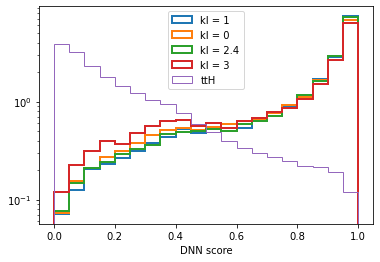

In [38]:
(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda100_5f_hhbbaa'].prediction, label='kl = 1', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda000_5f_hhbbaa'].prediction, label='kl = 0', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda240_5f_hhbbaa'].prediction, label='kl = 2.4', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda300_5f_hhbbaa'].prediction, label='kl = 3', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[df_only_bkg.process=='mgp8_pp_tth01j_5f_haa'].prediction, label='ttH', histtype=("step"), bins=20,density=True, range=(0,1));
plt.legend(loc = 'upper center')
plt.xlabel('DNN score')
plt.savefig(PLOT_FOLDER+'ttH_killer_dnn_score_log.pdf')
plt.yscale('log')
print(len(bins_b))

In [ ]:
###dnn Mx > 350

In [188]:
df_small = df_.loc[(df_.process!="mgp8_pp_tth01j_5f_haa") & (df_.Mx >=350) ]

In [189]:
df_small.process.unique()

array(['pwp8_pp_hh_lambda000_5f_hhbbaa', 'pwp8_pp_hh_lambda100_5f_hhbbaa',
       'pwp8_pp_hh_lambda240_5f_hhbbaa', 'pwp8_pp_hh_lambda300_5f_hhbbaa',
       'mgp8_pp_h012j_5f_haa', 'mgp8_pp_jjaa_5f', 'mgp8_pp_vh012j_5f_haa',
       'mgp8_pp_vbf_h01j_5f_haa'], dtype=object)

In [190]:
print(len(df_small.loc[df_small.label==0,"weight"]))
print(len(df_small.loc[df_small.label==1,"weight"]))

187290
4309703


In [191]:
for proc in df_small.process.unique():
    print(proc)
    print(len(df_small.loc[df_small.process==proc,"weight"]))
    print("---")

pwp8_pp_hh_lambda000_5f_hhbbaa
1107831
---
pwp8_pp_hh_lambda100_5f_hhbbaa
1037610
---
pwp8_pp_hh_lambda240_5f_hhbbaa
1265274
---
pwp8_pp_hh_lambda300_5f_hhbbaa
898988
---
mgp8_pp_h012j_5f_haa
4701
---
mgp8_pp_jjaa_5f
170556
---
mgp8_pp_vh012j_5f_haa
6918
---
mgp8_pp_vbf_h01j_5f_haa
5115
---


In [192]:
drop_indices = np.random.choice(df_small.loc[df_small.label == 1].index, 4280000, replace=False)
df_sub_small = df_small.drop(drop_indices)
drop_indices = np.random.choice(df_sub_small.loc[df_sub_small.process == "mgp8_pp_jjaa_5f"].index, 165000, replace=False)
#df_sub_small = df_small.drop(drop_indices)
df_sub_small = df_sub_small.drop(drop_indices)

In [193]:
#drop_indices = np.random.choice(df_small.loc[df_small.process == "pwp8_pp_hh_lambda000_5f_hhbbaa"].index, 188000, replace=False)
#df_sub_small = df_small.drop(drop_indices)
#drop_indices = np.random.choice(df_small.loc[df_small.process == "pwp8_pp_hh_lambda100_5f_hhbbaa"].index, 74500, replace=False)
#df_sub_small = df_sub_small.drop(drop_indices)
#drop_indices = np.random.choice(df_small.loc[df_small.process == "pwp8_pp_hh_lambda240_5f_hhbbaa"].index, 149600, replace=False)
#df_sub_small = df_sub_small.drop(drop_indices)
#drop_indices = np.random.choice(df_small.loc[df_small.process == "pwp8_pp_hh_lambda300_5f_hhbbaa"].index, 370200, replace=False)
#df_sub_small = df_sub_small.drop(drop_indices)
#drop_indices = np.random.choice(df_small.loc[df_small.process == "mgp8_pp_jjaa_5f"].index, 182000, replace=False)
#df_sub_small = df_sub_small.drop(drop_indices)

In [194]:
for proc in df_sub_small.process.unique():
    print(proc)
    print(len(df_sub_small.loc[df_sub_small.process==proc,"weight"]))
    print("---")

pwp8_pp_hh_lambda000_5f_hhbbaa
7528
---
pwp8_pp_hh_lambda100_5f_hhbbaa
7214
---
pwp8_pp_hh_lambda240_5f_hhbbaa
8743
---
pwp8_pp_hh_lambda300_5f_hhbbaa
6218
---
mgp8_pp_h012j_5f_haa
4701
---
mgp8_pp_jjaa_5f
5556
---
mgp8_pp_vh012j_5f_haa
6918
---
mgp8_pp_vbf_h01j_5f_haa
5115
---


In [195]:
print(len(df_sub_small.loc[df_sub_small.label==0,"weight"]))
print(len(df_sub_small.loc[df_sub_small.label==1,"weight"]))

22290
29703


In [196]:
X_train, X_test, y_train, y_test = train_test_split(df_sub_small[input_vars], df_sub_small.label, 
                                                    test_size=0.30, random_state=42)

In [197]:
model, history = simpleDNN(input_vars, X_train, X_test, y_train, y_test)

Epoch 1/500
36/36 [==============================] - 1s 16ms/step - loss: 1.8326 - binary_accuracy: 0.5311 - val_loss: 0.6477 - val_binary_accuracy: 0.6386
Epoch 2/500
36/36 [==============================] - 0s 9ms/step - loss: 0.8809 - binary_accuracy: 0.5508 - val_loss: 0.6585 - val_binary_accuracy: 0.7133
Epoch 3/500
36/36 [==============================] - 0s 9ms/step - loss: 0.7542 - binary_accuracy: 0.5798 - val_loss: 0.6218 - val_binary_accuracy: 0.7384
Epoch 4/500
36/36 [==============================] - 0s 9ms/step - loss: 0.6874 - binary_accuracy: 0.6268 - val_loss: 0.5855 - val_binary_accuracy: 0.7403
Epoch 5/500
36/36 [==============================] - 0s 8ms/step - loss: 0.6258 - binary_accuracy: 0.6811 - val_loss: 0.5611 - val_binary_accuracy: 0.7389
Epoch 6/500
36/36 [==============================] - 0s 9ms/step - loss: 0.5976 - binary_accuracy: 0.7023 - val_loss: 0.5425 - val_binary_accuracy: 0.7429
Epoch 7/500
36/36 [==============================] - 0s 9ms/step - lo

36/36 [==============================] - 0s 7ms/step - loss: 0.4689 - binary_accuracy: 0.7893 - val_loss: 0.4634 - val_binary_accuracy: 0.7915
Epoch 54/500
36/36 [==============================] - 0s 7ms/step - loss: 0.4689 - binary_accuracy: 0.7906 - val_loss: 0.4663 - val_binary_accuracy: 0.7919
Epoch 55/500
36/36 [==============================] - 0s 7ms/step - loss: 0.4685 - binary_accuracy: 0.7888 - val_loss: 0.4591 - val_binary_accuracy: 0.7925
Epoch 56/500
36/36 [==============================] - 0s 6ms/step - loss: 0.4666 - binary_accuracy: 0.7901 - val_loss: 0.4581 - val_binary_accuracy: 0.7927
Epoch 57/500
36/36 [==============================] - 0s 7ms/step - loss: 0.4665 - binary_accuracy: 0.7896 - val_loss: 0.4590 - val_binary_accuracy: 0.7923
Epoch 58/500
36/36 [==============================] - 0s 7ms/step - loss: 0.4651 - binary_accuracy: 0.7908 - val_loss: 0.4584 - val_binary_accuracy: 0.7931
Epoch 59/500
36/36 [==============================] - 0s 6ms/step - loss: 0.4

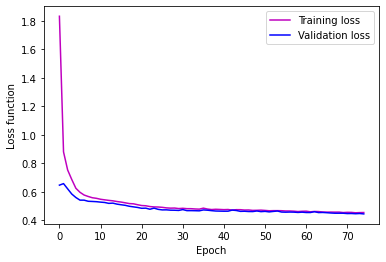

In [198]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='m',label='Training loss')
plt.plot(history.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.legend(loc='upper right')
plt.savefig(PLOT_FOLDER+'greater350_dnn_training_validation_loss.pdf')
plt.show()

[[0.5696238 ]
 [0.1480191 ]
 [0.7893981 ]
 ...
 [0.26288617]
 [0.8448404 ]
 [0.7467581 ]]


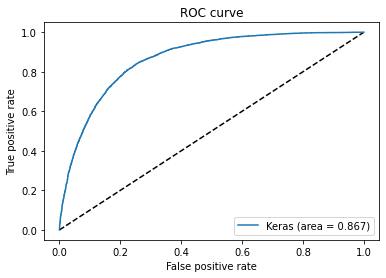

In [199]:
prediction = model.predict(X_test)
from sklearn.metrics import roc_curve
#y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, prediction)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

print(prediction)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='XGBoost (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig(PLOT_FOLDER+'greater350_dnn_ROC_dnn.pdf')
plt.show()

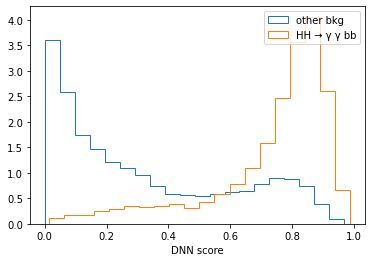

In [200]:
(n_b, bins_b, _) = plt.hist(prediction[y_test==0], label='other bkg', histtype=("step"), bins=20,density=True);
(n_s, bins_s, _) = plt.hist(prediction[y_test==1], label='HH \u2192 \u03B3 \u03B3 bb', histtype=("step"), bins =20,density=True);
plt.legend(loc = 'best')
plt.xlabel('DNN score')
plt.savefig(PLOT_FOLDER+'greater350_score_dnn.pdf')

In [201]:
df_sub_small['prediction_smaller350'] = model.predict(df_sub_small[input_vars])

In [202]:
df_only_bkg['prediction_smaller350'] = model.predict(df_only_bkg[input_vars])

/tmp/ipykernel_17516/428889027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_bkg['prediction_smaller350'] = model.predict(df_only_bkg[input_vars])


21


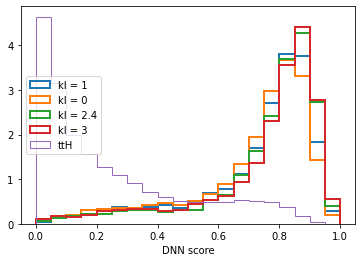

In [203]:
(n_b, bins_b, _) = plt.hist(df_sub_small.loc[df_sub_small.process=='pwp8_pp_hh_lambda100_5f_hhbbaa'].prediction_smaller350, label='kl = 1', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_sub_small.loc[df_sub_small.process=='pwp8_pp_hh_lambda000_5f_hhbbaa'].prediction_smaller350, label='kl = 0', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_sub_small.loc[df_sub_small.process=='pwp8_pp_hh_lambda240_5f_hhbbaa'].prediction_smaller350, label='kl = 2.4', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_sub_small.loc[df_sub_small.process=='pwp8_pp_hh_lambda300_5f_hhbbaa'].prediction_smaller350, label='kl = 3', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process!='mgp8_pp_tth01j_5f_haa') & (df_only_bkg.Mx >=350)].prediction_smaller350, label='ttH', histtype=("step"), bins=20,density=True, range=(0,1));
plt.legend(loc = 'center left')
plt.xlabel('DNN score')
plt.savefig(PLOT_FOLDER+'greater350_dnn_score_log.pdf')
#plt.yscale('log')
print(len(bins_b))

21


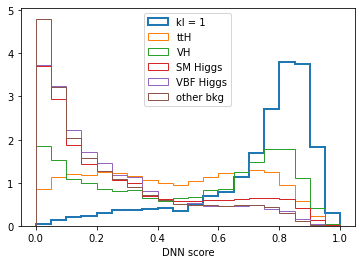

In [204]:
(n_b, bins_b, _) = plt.hist(df_sub_small.loc[df_sub_small.process=='pwp8_pp_hh_lambda100_5f_hhbbaa'].prediction_smaller350, label='kl = 1', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
#(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda000_5f_hhbbaa'].prediction, label='kl = 0', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
#(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda240_5f_hhbbaa'].prediction, label='kl = 2.4', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
#(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda300_5f_hhbbaa'].prediction, label='kl = 3', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));

(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process=='mgp8_pp_tth01j_5f_haa')& (df_only_bkg.Mx >=350)].prediction_smaller350, label='ttH', histtype=("step"), bins=20,density=True, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process=='mgp8_pp_vh012j_5f_haa')& (df_only_bkg.Mx >=350)].prediction_smaller350, label='VH', histtype=("step"), bins=20,density=True, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process=='mgp8_pp_h012j_5f_haa')& (df_only_bkg.Mx >=350)].prediction_smaller350, label='SM Higgs', histtype=("step"), bins=20,density=True, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process=='mgp8_pp_vbf_h01j_5f_haa') & (df_only_bkg.Mx >=350)].prediction_smaller350, label='VBF Higgs', histtype=("step"), bins=20,density=True, range=(0,1));

(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process == 'mgp8_pp_jjaa_5f') & (df_only_bkg.Mx >=350)].prediction_smaller350, label='other bkg', histtype=("step"), bins=20,density=True, range=(0,1));


plt.legend(loc = 'upper center')
plt.xlabel('DNN score')
plt.savefig(PLOT_FOLDER+'greater350_dnn_score_log_allBkg.pdf')
#plt.yscale('log')
print(len(bins_b))

In [205]:
model.save("./model_greater350_dnn")
print("Saved model to disk")

INFO:tensorflow:Assets written to: ./model_greater350_dnn/assets
Saved model to disk


In [ ]:
###smaller than 350

In [ ]:
def simpleWeightedDNN(input_vars,X_train, X_test, y_train, y_test):
    inputs = keras.Input(shape=(len(input_vars)-1,), name="particles")
    x = layers.Dense(132, activation="relu", name="dense_1")(inputs)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    x = layers.Dense(64, activation="relu", name="dense_3")(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(1, activation="sigmoid", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
          #optimizer=keras.optimizers.RMSprop(),  # Optimizer
          optimizer=keras.optimizers.Adam(),
          # Loss function to minimize
          loss=keras.losses.BinaryCrossentropy(),
          # List of metrics to monitor
          metrics=[keras.metrics.BinaryAccuracy()],
          )
    
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='binary_accuracy', min_delta=0.001, patience=10, verbose=1, mode='auto')
    history = model.fit(
    X_train[input_vars[:-1]],
    y_train,
    sample_weight=X_train[input_vars[-1]],
    batch_size=1028,
    epochs=100,
    callbacks = [earlystop],
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test[input_vars[:-1]], y_test),
    )
    return model, history

In [62]:
df_small = df_.loc[(df_.process!="mgp8_pp_tth01j_5f_haa") & (df_.Mx <350) ]

In [ ]:
#df_small["sample_weight"] = 1
#df_small.loc[df_small.process=="mgp8_pp_jjaa_5f","sample_weight"] =0.1
#df_small.loc[df_small.process=="mgp8_pp_vh012j_5f_haa","sample_weight"] =100
#df_small.loc[df_small.process=="mgp8_pp_vbf_h01j_5f_haa","sample_weight"] =100

In [63]:
print(len(df_small.loc[df_small.label==0,"weight"]))
print(len(df_small.loc[df_small.label==1,"weight"])) 

195420
786437


In [64]:
for proc in df_small.process.unique():
    print(proc)
    print(len(df_small.loc[df_small.process==proc,"weight"]))
    print("---")

pwp8_pp_hh_lambda000_5f_hhbbaa
188945
---
pwp8_pp_hh_lambda100_5f_hhbbaa
75544
---
pwp8_pp_hh_lambda240_5f_hhbbaa
150695
---
pwp8_pp_hh_lambda300_5f_hhbbaa
371253
---
mgp8_pp_h012j_5f_haa
1457
---
mgp8_pp_jjaa_5f
187138
---
mgp8_pp_vh012j_5f_haa
5426
---
mgp8_pp_vbf_h01j_5f_haa
1399
---


In [171]:
drop_indices = np.random.choice(df_small.loc[df_small.label == 1].index, 600000, replace=False)
df_sub_small = df_small.drop(drop_indices)
drop_indices = np.random.choice(df_sub_small.loc[df_sub_small.process == "mgp8_pp_jjaa_5f"].index, 10000, replace=False)
#df_sub_small = df_small.drop(drop_indices)
df_sub_small = df_sub_small.drop(drop_indices)

In [172]:
for proc in df_sub_small.process.unique():
    print(proc)
    print(len(df_sub_small.loc[df_sub_small.process==proc,"weight"]))
    print("---")

pwp8_pp_hh_lambda000_5f_hhbbaa
44854
---
pwp8_pp_hh_lambda100_5f_hhbbaa
17893
---
pwp8_pp_hh_lambda240_5f_hhbbaa
35727
---
pwp8_pp_hh_lambda300_5f_hhbbaa
87963
---
mgp8_pp_h012j_5f_haa
1457
---
mgp8_pp_jjaa_5f
177138
---
mgp8_pp_vh012j_5f_haa
5426
---
mgp8_pp_vbf_h01j_5f_haa
1399
---


In [173]:
print(len(df_sub_small.loc[df_sub_small.label==0,"weight"]))
print(len(df_sub_small.loc[df_sub_small.label==1,"weight"]))

185420
186437


In [174]:
input_vars

['njets',
 'pTb1_o_m_bb',
 'pTb2_o_m_bb',
 'pTbb_o_m_HH',
 'pTg1_o_m_gg',
 'pTg2_o_m_gg',
 'pTgg_o_m_HH',
 'sum_pt',
 'mindR_gb',
 'otherdR_gb',
 'GG_cosT_restHH',
 'B1_cosT_restBB',
 'G1_cosT_restGG',
 'DeltaPhi_gg',
 'DeltaEta_gg',
 'DeltaPhi_bb',
 'DeltaEta_bb',
 'DeltaPhi_HH',
 'DeltaEta_HH']

In [175]:
X_train, X_test, y_train, y_test = train_test_split(df_sub_small[input_vars], df_sub_small.label, 
                                                    test_size=0.30, random_state=42)

In [176]:
input_vars[-1]

'DeltaEta_HH'

In [177]:
model, history = simpleDNN(input_vars, X_train, X_test, y_train, y_test)

Epoch 1/500
254/254 [==============================] - 3s 7ms/step - loss: 0.8104 - binary_accuracy: 0.5089 - val_loss: 0.6910 - val_binary_accuracy: 0.5721
Epoch 2/500
254/254 [==============================] - 2s 6ms/step - loss: 0.6811 - binary_accuracy: 0.5636 - val_loss: 0.6436 - val_binary_accuracy: 0.6380
Epoch 3/500
254/254 [==============================] - 2s 6ms/step - loss: 0.6334 - binary_accuracy: 0.6407 - val_loss: 0.5984 - val_binary_accuracy: 0.6762
Epoch 4/500
254/254 [==============================] - 2s 6ms/step - loss: 0.6086 - binary_accuracy: 0.6697 - val_loss: 0.5878 - val_binary_accuracy: 0.6871
Epoch 5/500
254/254 [==============================] - 2s 6ms/step - loss: 0.5970 - binary_accuracy: 0.6822 - val_loss: 0.5844 - val_binary_accuracy: 0.6912
Epoch 6/500
254/254 [==============================] - 1s 6ms/step - loss: 0.5943 - binary_accuracy: 0.6844 - val_loss: 0.5809 - val_binary_accuracy: 0.6931
Epoch 7/500
254/254 [==============================] - 2s 

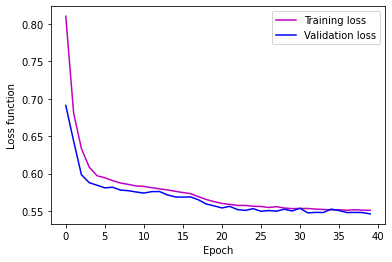

In [178]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='m',label='Training loss')
plt.plot(history.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss function')
plt.legend(loc='upper right')
plt.savefig(PLOT_FOLDER+'smaller350_dnn_training_validation_loss.pdf')
plt.show()

[[0.639566  ]
 [0.8543965 ]
 [0.14706305]
 ...
 [0.24662694]
 [0.42271772]
 [0.15350777]]


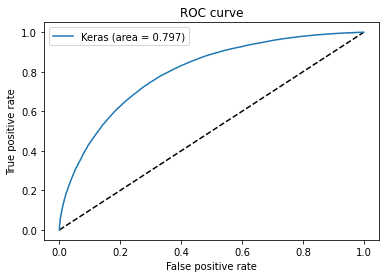

In [179]:
prediction = model.predict(X_test)
from sklearn.metrics import roc_curve
#y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, prediction)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

print(prediction)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='XGBoost (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig(PLOT_FOLDER+'smaller350_dnn_ROC_dnn.pdf')
plt.show()

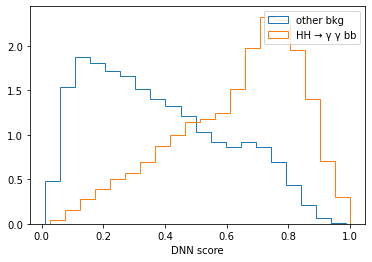

In [180]:
(n_b, bins_b, _) = plt.hist(prediction[y_test==0], label='other bkg', histtype=("step"), bins=20,density=True);
(n_s, bins_s, _) = plt.hist(prediction[y_test==1], label='HH \u2192 \u03B3 \u03B3 bb', histtype=("step"), bins =20,density=True);
plt.legend(loc = 'best')
plt.xlabel('DNN score')
plt.savefig(PLOT_FOLDER+'smaller350_score_dnn.pdf')

In [181]:
df_sub_small['prediction_smaller350'] = model.predict(df_sub_small[input_vars])

In [182]:
df_only_bkg['prediction_smaller350'] = model.predict(df_only_bkg[input_vars])

/tmp/ipykernel_17516/428889027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_only_bkg['prediction_smaller350'] = model.predict(df_only_bkg[input_vars])


21


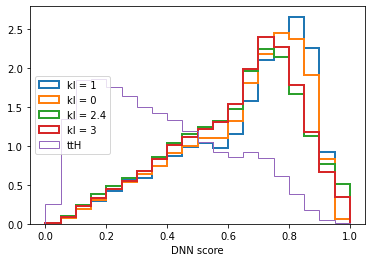

In [183]:
(n_b, bins_b, _) = plt.hist(df_sub_small.loc[df_sub_small.process=='pwp8_pp_hh_lambda100_5f_hhbbaa'].prediction_smaller350, label='kl = 1', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_sub_small.loc[df_sub_small.process=='pwp8_pp_hh_lambda000_5f_hhbbaa'].prediction_smaller350, label='kl = 0', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_sub_small.loc[df_sub_small.process=='pwp8_pp_hh_lambda240_5f_hhbbaa'].prediction_smaller350, label='kl = 2.4', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_sub_small.loc[df_sub_small.process=='pwp8_pp_hh_lambda300_5f_hhbbaa'].prediction_smaller350, label='kl = 3', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process!='mgp8_pp_tth01j_5f_haa') & (df_only_bkg.Mx < 350)].prediction_smaller350, label='ttH', histtype=("step"), bins=20,density=True, range=(0,1));
plt.legend(loc = 'center left')
plt.xlabel('DNN score')
plt.savefig(PLOT_FOLDER+'smaller350_dnn_score_log.pdf')
#plt.yscale('log')
print(len(bins_b))

21


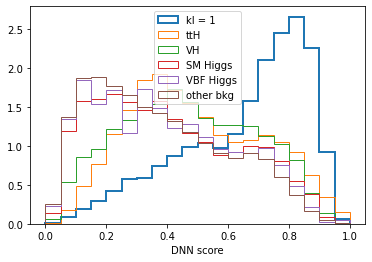

In [184]:
(n_b, bins_b, _) = plt.hist(df_sub_small.loc[df_sub_small.process=='pwp8_pp_hh_lambda100_5f_hhbbaa'].prediction_smaller350, label='kl = 1', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
#(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda000_5f_hhbbaa'].prediction, label='kl = 0', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
#(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda240_5f_hhbbaa'].prediction, label='kl = 2.4', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));
#(n_b, bins_b, _) = plt.hist(df_subset.loc[df_subset.process=='pwp8_pp_hh_lambda300_5f_hhbbaa'].prediction, label='kl = 3', histtype=("step"), bins=20,density=True, alpha=1.0, linewidth=2, range=(0,1));

(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process=='mgp8_pp_tth01j_5f_haa')& (df_only_bkg.Mx < 350)].prediction_smaller350, label='ttH', histtype=("step"), bins=20,density=True, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process=='mgp8_pp_vh012j_5f_haa')& (df_only_bkg.Mx < 350)].prediction_smaller350, label='VH', histtype=("step"), bins=20,density=True, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process=='mgp8_pp_h012j_5f_haa')& (df_only_bkg.Mx < 350)].prediction_smaller350, label='SM Higgs', histtype=("step"), bins=20,density=True, range=(0,1));
(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process=='mgp8_pp_vbf_h01j_5f_haa')& (df_only_bkg.Mx < 350)].prediction_smaller350, label='VBF Higgs', histtype=("step"), bins=20,density=True, range=(0,1));

(n_b, bins_b, _) = plt.hist(df_only_bkg.loc[(df_only_bkg.process == 'mgp8_pp_jjaa_5f')& (df_only_bkg.Mx < 350)].prediction_smaller350, label='other bkg', histtype=("step"), bins=20,density=True, range=(0,1));


plt.legend(loc = 'upper center')
plt.xlabel('DNN score')
plt.savefig(PLOT_FOLDER+'smaller350_dnn_score_log_allBkg.pdf')
#plt.yscale('log')
print(len(bins_b))

In [187]:
model.save("./model_smaller350_dnn")
print("Saved model to disk")

INFO:tensorflow:Assets written to: ./model_smaller350_dnn/assets
Saved model to disk
